In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## Try all models without the "Major" elements

`We define elements as ‘‘major’’ if they are essential constituents of the minerals making up a rock, that is, in the sense of the phase rule. Thus, silicon, aluminum, chromium, magne- sium, iron, calcium, sodium, and oxygen are major elements because they are essential con- stituents of the upper-mantle minerals—oli- vine, pyroxene, garnet, spinel, and plagioclase. Adding or subtracting such elements can change the phase assemblage.`

## Why tracer elemets only?

`Trace elements, on the other hand, just replace a few atoms of the major elements in the crystal structures without affecting the phase assemblage signi- ficantly. They are essentially blind passengers in many mantle processes, and they are there- fore immensely useful as tracers of such proc- esses. During solid-phase transformations, they will redistribute themselves locally between the newly formed mineral phases but, during mel- ting, they are partitioned to a greater or lesser degree into the melt. When such a melt is transported to the Earth’s surface, where it can be sampled, its trace elements carry a wealth of information about the composition of the
source rock and the nature of the melting proc- esses at depth.«`

remove elements with oxygen in them

In [2]:
#removing elements with major elements 
tracers = np.array(['Rb', 'Sr', 'Y', 'Zr', 'Nb', 'Ba', 'La', 'Ce', 'Pr',
       'Nd', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu',
       'Hf', 'Ta', 'Th', 'U', 'Ni'], dtype=object)

In [3]:
majors = ["Si", "Al", "Cr", "Mg","Fe", "Ca", "Na", "O"]

## Performin random forest permutation

In [4]:

#########################################################################################################################
p_ = r"/Users/jenifervivar/Documents/GitHub/OceanBasaltML/basalts thesis/src/data/combined_datasets"
combined_df = pd.read_csv(p_)
p = "/Users/jenifervivar/Documents/GitHub/OceanBasaltML/basalts thesis/src/data/variables_target_file"
sampled_df = pd.read_csv(p)
col = sampled_df[tracers]
#print(col)

#########################################################################################################################
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_standard = scaler.fit_transform(sampled_df[tracers])
sampled_df[tracers] = x_standard
combined_df[tracers] = x_standard

#########################################################################################################################

from sklearn.model_selection import train_test_split
# X = sampled_df[col], y = sampled_df["Tectonic_setting"]
X_train, X_test, y_train, y_test = train_test_split(sampled_df[tracers],sampled_df["Tectonic_setting"],\
                                                    test_size=0.3, random_state=100)

from imblearn.over_sampling import RandomOverSampler
over_sampler = RandomOverSampler(random_state=42)
X_bal, y_bal = over_sampler.fit_resample(X_train, y_train)


from sklearn.ensemble import RandomForestClassifier
labels = sampled_df[tracers].columns.to_list()
rf_ = RandomForestClassifier(n_estimators = 500, random_state = 1)

rf_.fit(X_bal, y_bal)

from sklearn.inspection import permutation_importance
import time

start_time = time.time()
result = permutation_importance(
    rf_, X_test, y_test, n_repeats=20, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=labels)

Error processing line 1 of /Users/jenifervivar/opt/anaconda3/lib/python3.9/site-packages/google_auth-1.4.2-py2.7-nspkg.pth:

  Traceback (most recent call last):
    File "/Users/jenifervivar/opt/anaconda3/lib/python3.9/site.py", line 169, in addpackage
      exec(line)
    File "<string>", line 1, in <module>
    File "<frozen importlib._bootstrap>", line 562, in module_from_spec
  AttributeError: 'NoneType' object has no attribute 'loader'

Remainder of file ignored
Error processing line 1 of /Users/jenifervivar/opt/anaconda3/lib/python3.9/site-packages/google_auth-1.4.2-py2.7-nspkg.pth:

  Traceback (most recent call last):
    File "/Users/jenifervivar/opt/anaconda3/lib/python3.9/site.py", line 169, in addpackage
      exec(line)
    File "<string>", line 1, in <module>
    File "<frozen importlib._bootstrap>", line 562, in module_from_spec
  AttributeError: 'NoneType' object has no attribute 'loader'

Remainder of file ignored
Error processing line 1 of /Users/jenifervivar/opt/ana

Elapsed time to compute the importances: 32.848 seconds


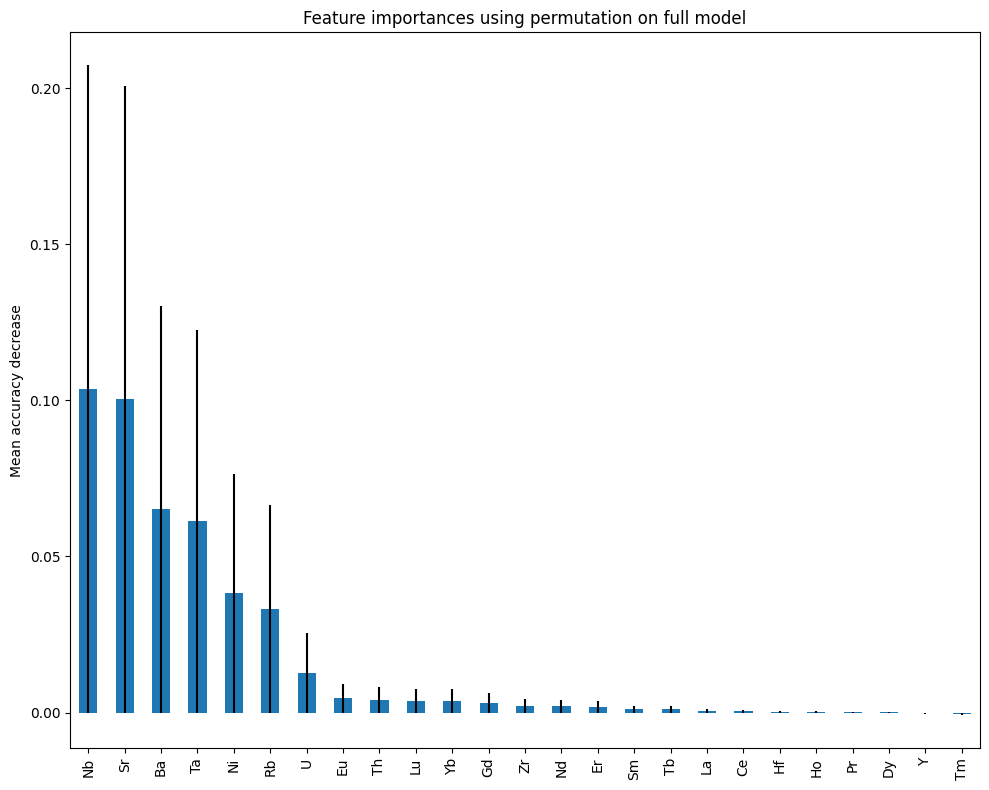

In [5]:
sorted_idx = forest_importances.argsort()[::-1] 
fig, ax = plt.subplots(figsize=(10,8))
forest_importances[sorted_idx].plot.bar(yerr=result.importances_mean[sorted_idx], ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
#plt.savefig("/Users/jenifervivar/Documents/GitHub/OceanBasaltML/basalts thesis/reports/figures/tracer_permuta_forest")
plt.show()

In [6]:
rf_vals = forest_importances.index.values
rf_vals

array(['Rb', 'Sr', 'Y', 'Zr', 'Nb', 'Ba', 'La', 'Ce', 'Pr', 'Nd', 'Sm',
       'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Hf', 'Ta',
       'Th', 'U', 'Ni'], dtype=object)

## Logisti Regression Apporach

In [7]:
from sklearn.linear_model import LogisticRegression

#training the model
lr = LogisticRegression(C= 100, random_state = 1, multi_class = 'ovr', solver = "lbfgs")
lr.fit(X_bal, y_bal)
y_result = lr.predict(X_test)

/Users/jenifervivar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


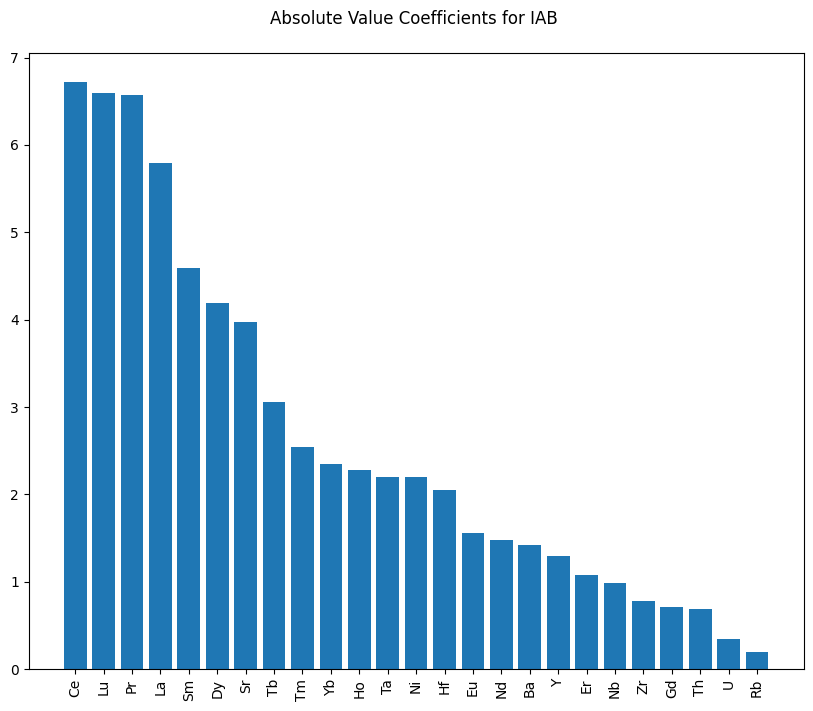

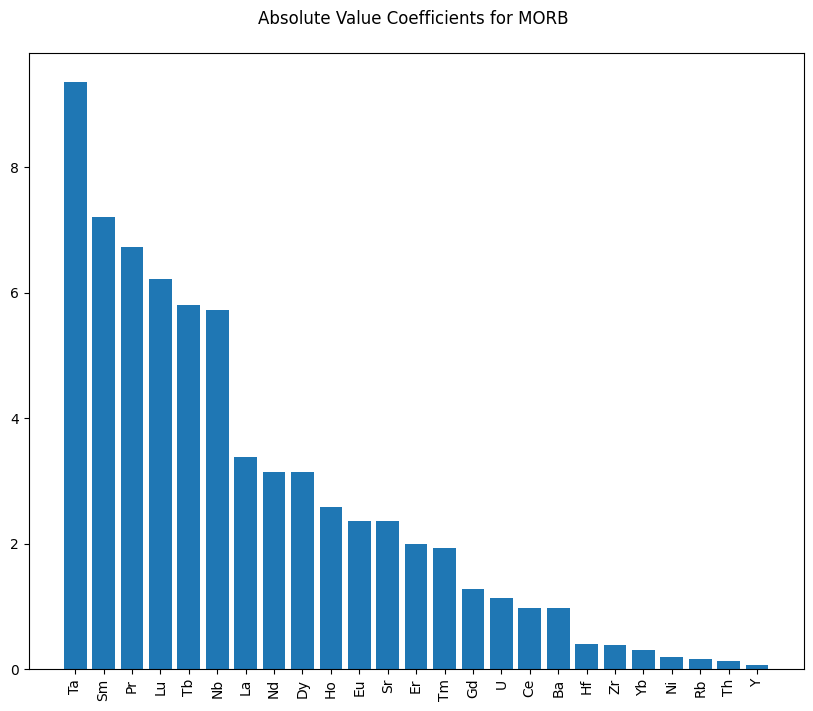

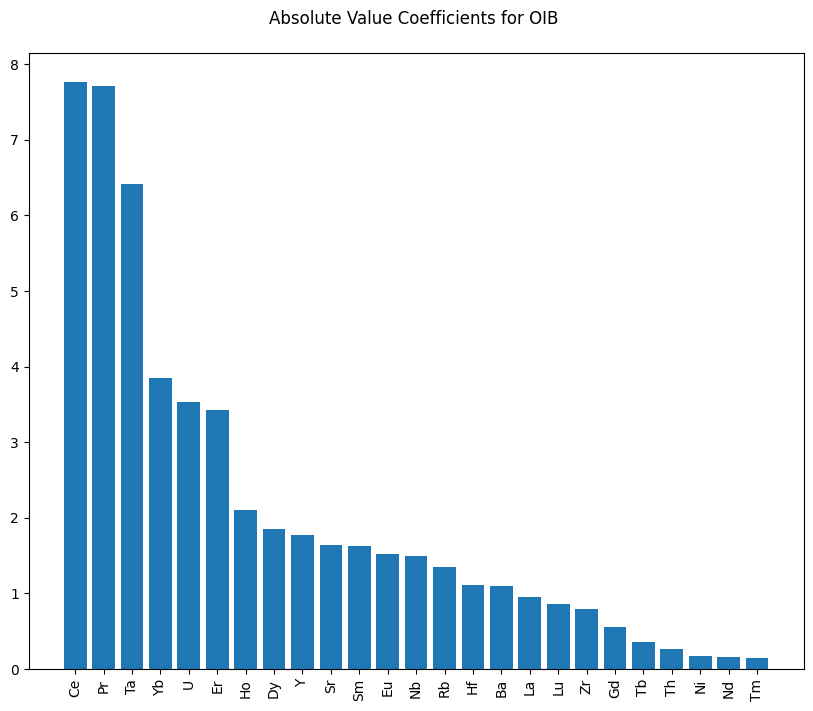

In [8]:
coef = np.abs(lr.coef_)
tec = ["IAB", "MORB", "OIB"]
lr_feat = {}
for i in range(3):
    idx = np.argsort(coef[i])[::-1]
    plt.figure(figsize=(10,8))
    plt.bar(sampled_df[tracers].columns[idx], coef[i][idx])
    plt.title(f"Absolute Value Coefficients for {tec[i]} \n")
    plt.xticks(rotation = 90)
    lr_feat[tec[i]] = sampled_df[tracers].columns[idx].values
    #plt.savefig("/Users/jenifervivar/Documents/GitHub/OceanBasaltML/basalts thesis/reports/figures/lr_tracers_coef_"+ tec[i])
    plt.show()
    


In [9]:
from sklearn.feature_selection import RFE
lr = LogisticRegression(C= 100, random_state = 1, multi_class = 'ovr', solver = "lbfgs")

selector = RFE(lr, n_features_to_select=10, step=1, importance_getter = 'auto')
selector.fit(X_bal, y_bal)
idx = selector.ranking_

/Users/jenifervivar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/jenifervivar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

Text(0, 0.5, 'Rank')

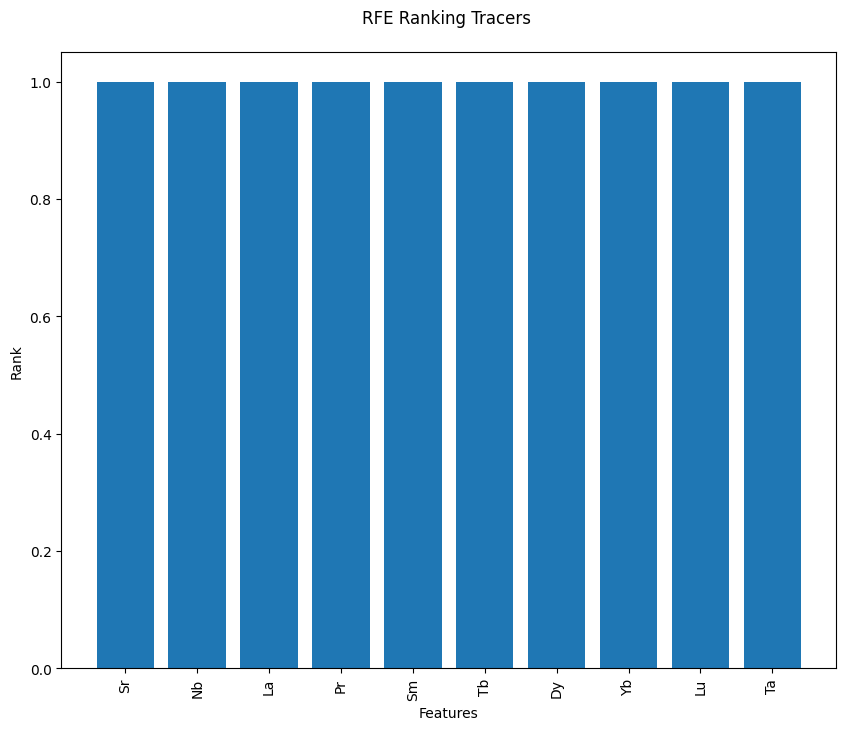

In [10]:
fig, ax = plt.subplots(figsize=(10,8))
plt.bar(sampled_df[tracers].columns[selector.support_], idx[idx==1])
plt.title("RFE Ranking Tracers \n")
plt.xticks(rotation = 90)
ax.set_xlabel("Features")
ax.set_ylabel("Rank")
#plt.savefig("/Users/jenifervivar/Documents/GitHub/OceanBasaltML/basalts thesis/reports/figures/lrRFE_tracers")

In [11]:
rfe_lr =sampled_df[tracers].columns[selector.support_].values

## Checking what elements are the same across all models

In [12]:
bool_ =np.isin(rf_vals, rfe_lr)
bool_

array([False,  True, False, False,  True, False,  True, False,  True,
       False,  True, False, False,  True,  True, False, False, False,
        True,  True, False,  True, False, False, False])

In [13]:
len(bool_)

25

In [14]:
rf_vals[bool_]

array(['Sr', 'Nb', 'La', 'Pr', 'Sm', 'Tb', 'Dy', 'Yb', 'Lu', 'Ta'],
      dtype=object)

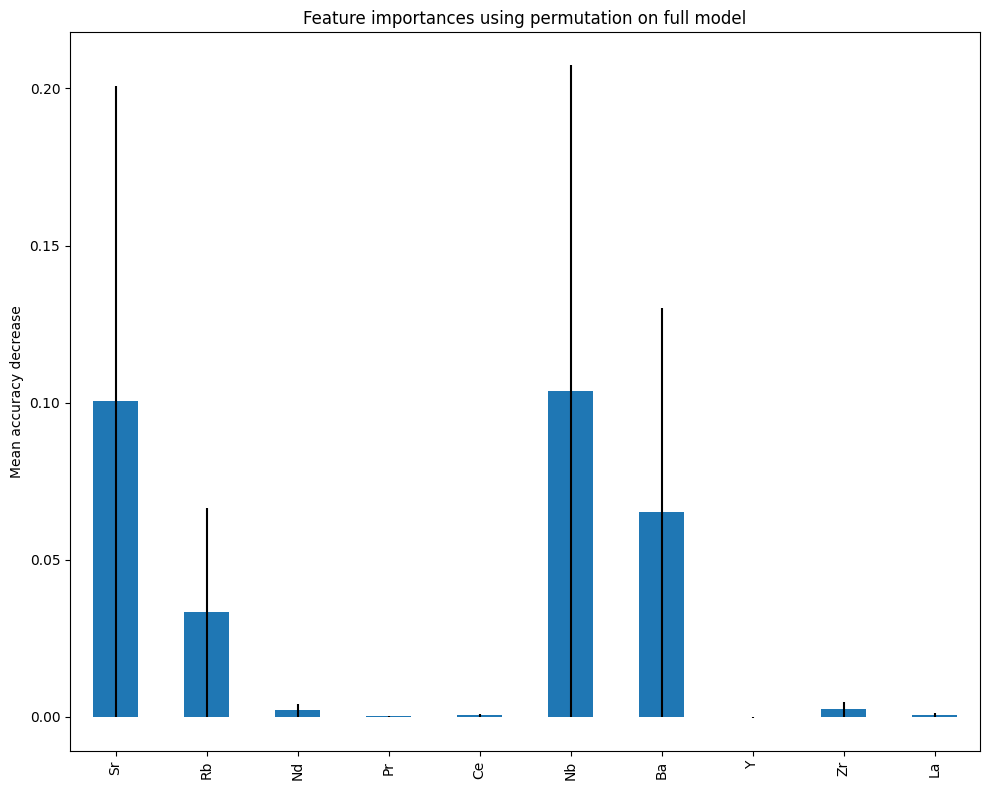

In [15]:
sorted_idx_ = forest_importances[bool_].argsort()[::-1] 
fig, ax = plt.subplots(figsize=(10,8))
forest_importances[sorted_idx_].plot.bar(yerr=result.importances_mean[sorted_idx_], ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
#plt.savefig("/Users/jenifervivar/Documents/GitHub/OceanBasaltML/basalts thesis/reports/figures/tracer_LRinRF")
plt.show()

Text(0, 0.5, 'Rank')

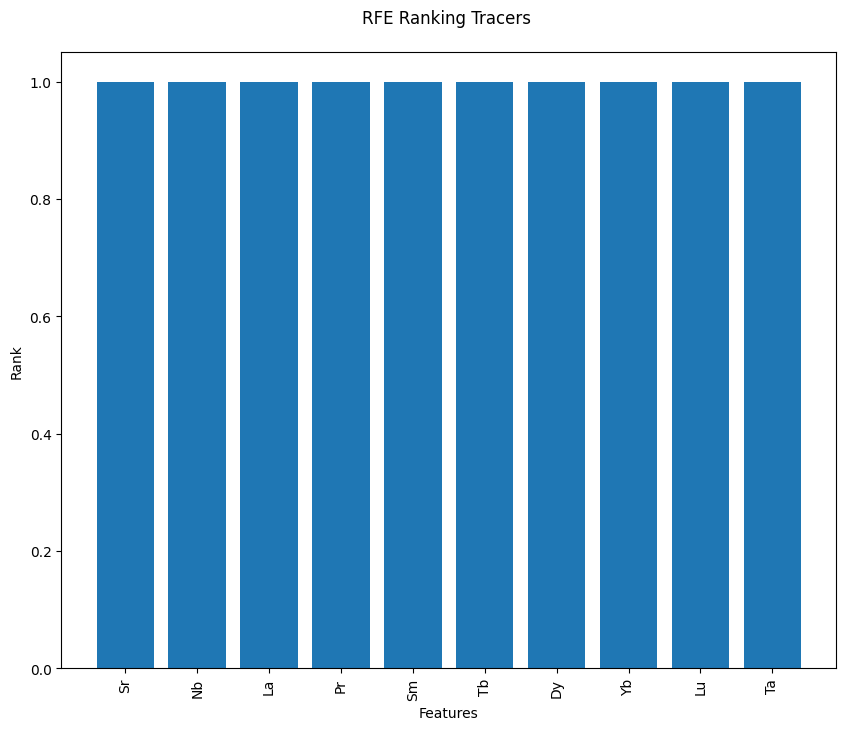

In [16]:
fig, ax = plt.subplots(figsize=(10,8))
plt.bar(sampled_df[tracers].columns[bool_], idx[idx==1])
plt.title("RFE Ranking Tracers \n")
plt.xticks(rotation = 90)
ax.set_xlabel("Features")
ax.set_ylabel("Rank")
#plt.savefig("/Users/jenifervivar/Documents/GitHub/OceanBasaltML/basalts thesis/reports/figures/lrRFE_tracers")